In [6]:
import numpy as np
import math as mt
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d
import random as rn

In [16]:
rp = np.array([1,0.5])
d = np.append(rp,1)
d

array([1. , 0.5, 1. ])

# Task A and B

In [7]:
def TrNN(r,f,rp):
    d = np.ndarray(3)
    w = np.ndarray(3)
    for i in range(0,3):
        # determine the distances of rp from vertices
        d[i] = mt.sqrt( (r[i,0]-rp[0])**2 + (r[i,1]-rp[1])**2   )
        # determine the weight for this vertex
        w[i] = 1/ d[i]
    # interpolate with weights
    frp = ( w[0]*f[0] + w[1]*f[1] + w[2]*f[2] ) / (w[0]+[w[1]+w[2]])
    return frp

In [3]:
# Matrix method
def TrBaryc(r,f,rp):
    # form matrix A
    # the first two rows of A are the x and y coordinates of the three vertices
    A = np.copy(np.transpose(r))
    # third row of A is made of ones
    A = np.append(A,[[1,1,1]], axis=0)
    # form d
    # first two rows of d are the x and y coordinate of rp, third row is a one
    d = np.append(rp,1)
    # invert A and multiply by d to find the lambdas
    l = np.dot(np.linalg.inv(A),d)
    # interpolate with the lambdas
    frp = l[0]*f[0] + l[1]*f[1] + l[2]*f[2]
    return frp

1.25
[[0.  0. ]
 [1.  1. ]
 [2.  0. ]
 [1.  0.5]]
[0.   1.   3.   1.25]


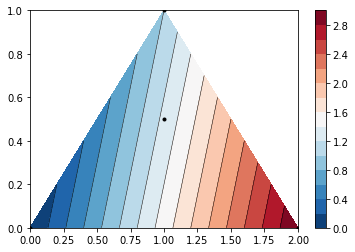

In [4]:
# testing code

# define a triangle
r = np.array([[0,0],[1,1],[2,0]])
# define a point rp within the triangle
rp = np.array([1,0.5])
# define the value of teh function at the vertices
f = np.array([0,1,3])

# interpolate
#frp = TrNN(r,f,rp)
frp = TrBaryc(r,f,rp)
print(frp)
# append rp to the vertices and frp for f
r = np.append(r,[rp],axis=0)
f = np.append(f,frp)
print(r)

# plot in 3d: f vs (x and y)
x = r[:,0]
y = r[:,1]
print(f)
fig, (ax1) = pl.subplots(nrows=1)
ax1.tricontour(x, y, f, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.tricontourf(x, y, f, levels=14, cmap="RdBu_r")
fig.colorbar(cntr1, ax=ax1)
ax1.plot(x,y,'ko', ms=3)

# Task C

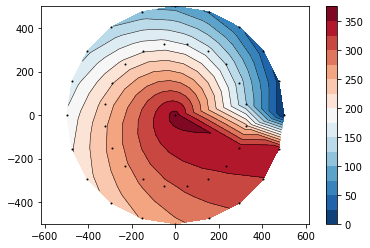

In [17]:
R = 500 # radius of circle
N = 20 # number of sectors, ie triangles
L = 1 # number of levels of mesh refinememnt


nglob = np.ndarray((N+1,2))  # global nodes: coordinates (x,y) of node i at position i
conn = np.zeros((N,3))       # connectivity: nodal vertices of a triangle (node1, node2, node3)
conn = conn.astype(int)      # make sure conn is an array of integer, as it will contain position of nodes in nglob
f = np.ndarray(N+1)          # values of f at nodes
r = np.ndarray((3,2))
fr = np.ndarray(3)

# generate the mesh
# generate N triangles
for i in range(0,N):
    # I am now generating a node on the circle
    # angle in rads
    angle = (i*360/N) * np.pi / 180
    # coordinate of teh nodes, stored in nglob
    nglob[i,0] = R * np.cos(angle)
    nglob[i,1] = R * np.sin(angle)
    # value of f for this node (it can be of your choice)
    f[i] = i*360/N    #* rn.random()
    # IMPORTANT: establish nodal connectivity
    # the follwoing nodes will be the vertices of triangle i
    conn[i,0] = i  # this node on the circle
    conn[i,1] = i+1 # the next node on the circle
    conn[i,2] = N   # the central node

# set the central node
conn[N-1,1] = 0 # connect to zero-th node
nglob[N,:] = [0,0] # assign coordinates
f[N] = 360 # assign some value to f or node N



# now interpolate and refine the mesh for L level
for l in range(0,L):
    Nt = N # number of triangles at this level
    # copy the current connectivity, before modifying it
    cpconn = np.copy(conn)
    # number of triangles for the refined mesh (every current triangle will contain three new triangles)
    N = Nt * 3
    # define array for connectivity (we have saved current conenctivity in cpconn)
    conn = np.ndarray((N,3))
    conn = conn.astype(int)
    # counter for new triangles
    iconn = 0
    # current number of global nodes
    Ng = len(nglob)
    
    # for every existing triangle
    for i in range(0,Nt):
        # find the three nodes for this triangle, and their coordinates
        for k in range(0,3):
            # coordinates
            r[k,:] = nglob[cpconn[i,k],:]
            # values of f
            fr[k] = f[cpconn[i,k]]
        # establish coordinates of new node, at the centroid
        centrx = ( r[0,0] + r[1,0] + r[2,0] ) / 3
        centry = ( r[0,1] + r[1,1] + r[2,1] ) / 3
       
        # interpolate at the new node (at the centroid)
        rp = [centrx,centry]
        frp = TrBaryc(r,fr,rp)

        # update connectivity and global nodes
        # append the new node rp to the list of global nodes
        nglob = np.append(nglob,[rp],axis=0)
        # append the value of frp
        f = np.append(f,frp)
        
        # update connectivity for the three new triangles
        # first new triangle (iconn): node 0, node 1, new node rp (stored in nglob at position Ng+1)
        conn[iconn,:] = [cpconn[i,0],cpconn[i,1],Ng+i]
        # second new triangle (iconn+1): node 1, node 2, new node rp (stored in nglob at position Ng+1)
        conn[iconn+1,:] = [cpconn[i,1],cpconn[i,2],Ng+i]
        # third new triangle (iconn): node 2, node 0, new node rp (stored in nglob at position Ng+1)
        conn[iconn+2,:] = [cpconn[i,2],cpconn[i,0],Ng+i]
        # update counting for triangles
        iconn += 3


        
x = nglob[:,0]
y = nglob[:,1]
fig, (ax1) = pl.subplots(nrows=1)
ax1.plot(x,y,'ko', ms=1)
ax1.axis('equal')
ax1.tricontour(x, y, f, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.tricontourf(x, y, f, levels=14, cmap="RdBu_r")
fig.colorbar(cntr1, ax=ax1)
